In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# sns.axes_style()
sns.set(font_scale=1.5)
sns.set_style('white', {
                         'axes.facecolor': 'white',
                         'axes.edgecolor': 'black',
                         'axes.grid': False,
                         'axes.axisbelow': 'line',
                         'axes.labelcolor': 'black',
                         'figure.facecolor': 'white',
                         'grid.color': '.9',
                         'grid.linestyle': '-',
                         'text.color': 'black',
                         'xtick.color': 'black',
                         'ytick.color': 'black',
                         'xtick.direction': 'out',
                         'ytick.direction': 'out',
                         'patch.edgecolor': 'black',
                         'patch.force_edgecolor': False,
                         'image.cmap': 'viridis',
                         'font.family':'serif', 
                         'font.serif':'Times New Roman', 
                         'xtick.bottom': True,
                         'xtick.top': False,
                         'ytick.left': True,
                         'ytick.right': False,
                         'axes.spines.left': True,
                         'axes.spines.bottom': True,
                         'axes.spines.right': True,
                         'axes.spines.top': True
                        }
             )

In [3]:
filter_funcs = ["ROR", "SOR", "DROR", "DSOR", "LIOR", "DDIOR"]#, "AGDOR"

In [4]:
dfs = []
metrics = {}
for filter_func in filter_funcs:
    df = pd.read_pickle(f"results/{filter_func}_res.pkl")
    df["Exec_Time"] = 1000*df["Exec_Time"]
    df["Precision"] = df["TP"]/(df["TP"]+df["FP"])
    df["Recall"] = df["TP"]/(df["TP"]+df["FN"])
    df["F1_Score"] = 2*df["TP"]/(2*df["TP"]+df["FP"]+df["FN"])
    df["Object_As_Snow_Point_Percentage"] = 100*df['Object_As_Snow']/df['Total_Object_Points']
    df["Filter"] = [filter_func]*len(df)
    df["Accuracy"] = (df["TP"]+df["TN"])/(df["TP"]+df["FP"]+df["FN"]+df["TN"])
    max_det_reduced_percentage = (df["Max_Dist_BF"].mean()-df["Max_Dist_AF"].mean())/df["Max_Dist_BF"].mean()
    df = df.reset_index(drop=True)
    dfs.append(df)
    
    metrics[filter_func] = {
        "Exec_Time": df["Exec_Time"].mean(),
        "Precision": df["Precision"].mean(),
        "Recall": df["Recall"].mean(),
        "F1_Score": df["F1_Score"].mean(),
        "Object_As_Snow_Point_Percentage": df["Object_As_Snow_Point_Percentage"].mean(),
        "Accuracy": df["Accuracy"].mean(),
        "Max Range Reduction (%)": max_det_reduced_percentage*100
    }

In [5]:
metrics["ROR"]

{'Exec_Time': 46.86414102695064,
 'Precision': 0.18232627331445264,
 'Recall': 0.2874360109781094,
 'F1_Score': 0.2101884036785452,
 'Object_As_Snow_Point_Percentage': 13.495680754544425,
 'Accuracy': 0.7174713946635008,
 'Max Range Reduction (%)': 63.479550608714355}

In [ ]:
df_metrics = pd.DataFrame([], index=['ROR', 'SOR', 'DROR', 'DSOR', 'LIOR', 'DDIOR'],
                          columns=['Accuracy', 'Precision', 'Recall', 'F1_Score', 'Object_As_Oulier (%)', 'Exec_Time (ms)', "Max Range Reduction (%)"])

for filter_name, metric in metrics.items():
    df_metrics.loc[filter_name, :] = (metric["Accuracy"], 
                                    metric["Precision"], 
                                    metric["Recall"], 
                                    metric["F1_Score"], 
                                    metric["Object_As_Snow_Point_Percentage"], 
                                    metric["Exec_Time"],
                                    metric["Max Range Reduction (%)"])

In [ ]:
df_metrics

In [ ]:
s = df_metrics.style.format("{:.3f}").highlight_max(props='textbf:--rwrap;')
print(s.to_latex(column_format="lccccccc", multicol_align='c', hrules=True)) #

In [6]:
dfs = pd.concat(dfs)
dfs = dfs.reset_index(drop=True)

In [7]:
dfs["Total_Points"].mean()

117312.79266958425

In [8]:
dfs["Accuracy"].mean()

0.8443274233229303

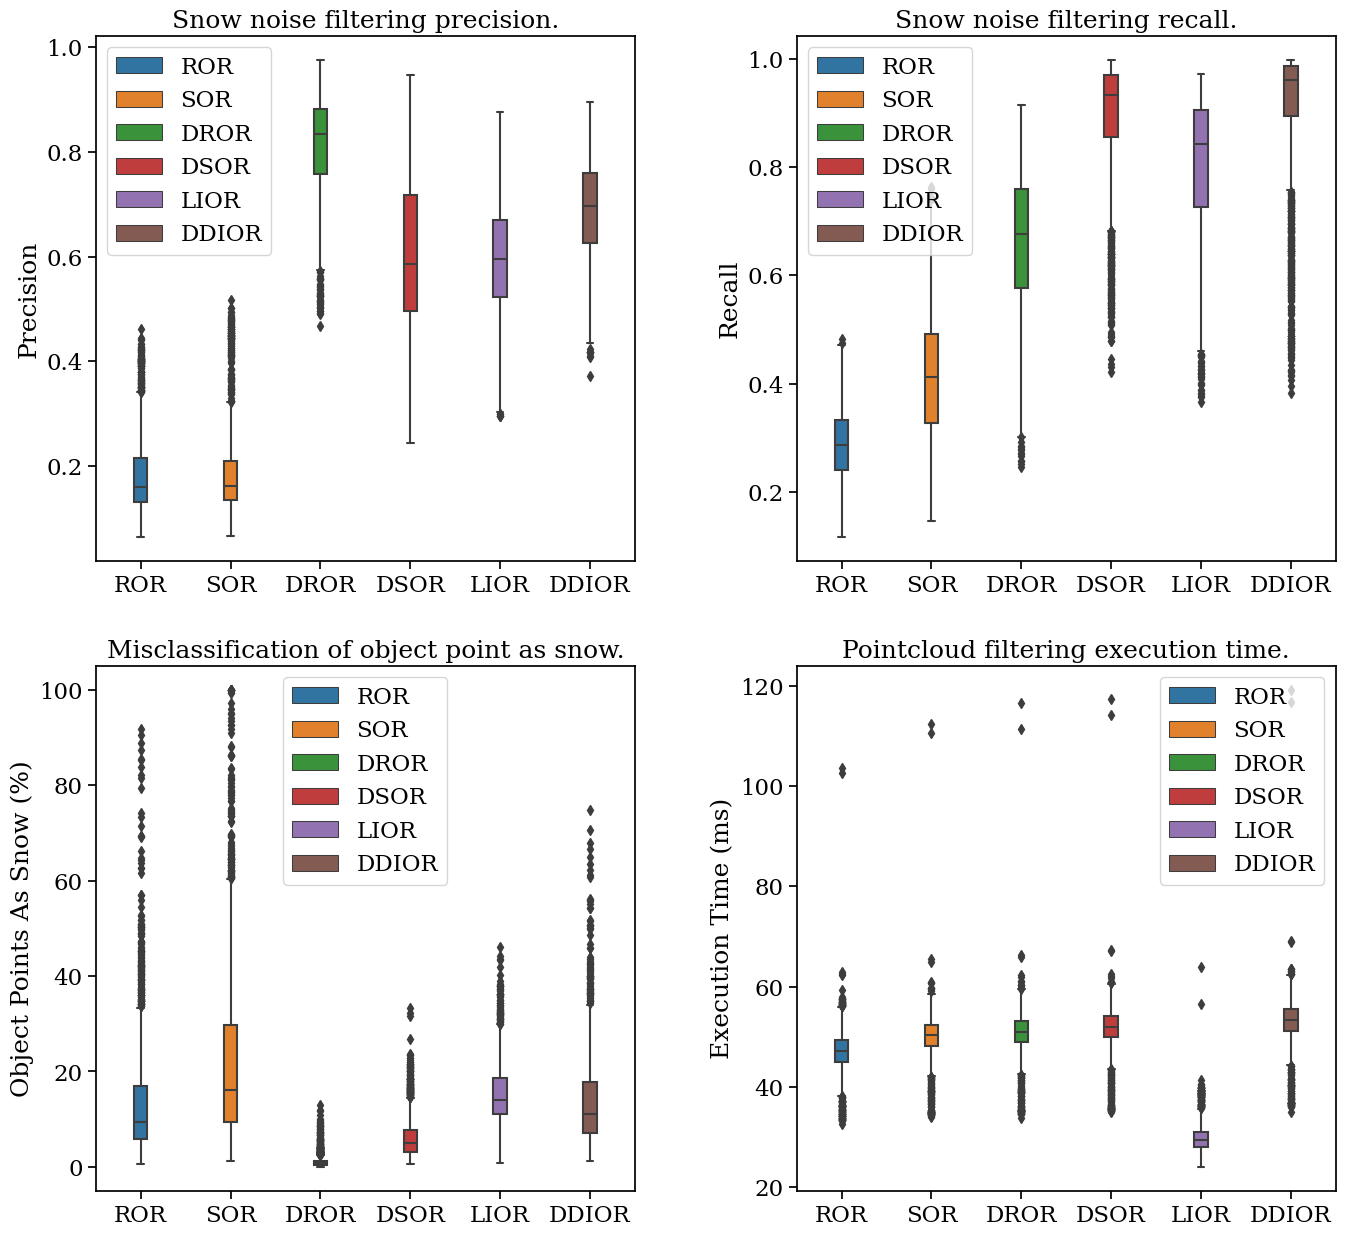

In [29]:
fig = plt.figure(1, figsize=(16,15))

ax_precision = fig.add_subplot(221)
ax_recall = fig.add_subplot(222)
ax_exec = fig.add_subplot(224)
ax_objs = fig.add_subplot(223)

sns.boxplot(data=dfs, 
            x="Filter", 
            y="Precision", 
            hue="Filter", 
            width=0.15,
            dodge=False,
            palette='tab10',
            ax=ax_precision)
ax_precision.legend(frameon=True)
ax_precision.set_xlabel('')
ax_precision.set_title("Snow noise filtering precision.")

sns.boxplot(data=dfs, 
            x="Filter", 
            y="Recall", 
            hue="Filter", 
            width=0.15,
            dodge=False,
            palette='tab10',
           ax=ax_recall)
ax_recall.legend(frameon=True)
ax_recall.set_xlabel('')
ax_recall.set_title("Snow noise filtering recall.")

sns.boxplot(data=dfs, 
            x="Filter", 
            y="Exec_Time", 
            hue="Filter", 
            width=0.15,
            dodge=False,
           palette='tab10',
           ax=ax_exec)
ax_exec.set_ylabel("Execution Time (ms)")
ax_exec.legend(frameon=True)
ax_exec.set_xlabel('')
ax_exec.set_title("Pointcloud filtering execution time.")

sns.boxplot(data=dfs, 
            x="Filter", 
            y="Object_As_Snow_Point_Percentage", 
            hue="Filter", 
            width=0.15,
            dodge=False,
           palette='tab10',
           ax=ax_objs)
ax_objs.set_ylabel("Object Points As Snow (%)")
ax_objs.legend(frameon=True)
ax_objs.set_xlabel('')
ax_objs.set_title("Misclassification of object point as snow.")

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.2)
plt.savefig("something.pdf", dpi=300, bbox_inches='tight')

In [ ]:
sns.boxplot(data=dfs, 
            x="Filter", 
            y="Precision", 
            hue="Filter", 
            width=0.15,
            dodge=False,
           palette='tab10',
           ax=ax)
plt.tight_layout()
plt.savefig("Filter_precision.pdf", dpi=300)

In [ ]:
sns.boxplot(data=dfs, 
            x="Filter", 
            y="Recall", 
            hue="Filter", 
            width=0.15,
            dodge=False,
           palette='tab10')
plt.tight_layout()
plt.savefig("Filter_recall.pdf", dpi=300)

In [ ]:
sns.boxplot(data=dfs, 
            x="Filter", 
            y="Exec_Time", 
            hue="Filter", 
            width=0.15,
            dodge=False,
           palette='tab10')
plt.ylabel("Execution Time (ms)")
plt.tight_layout()
plt.savefig("Filter_exec_time.pdf", dpi=300)

In [ ]:
sns.boxplot(data=dfs, 
            x="Filter", 
            y="Object_As_Snow_Point_Percentage", 
            hue="Filter", 
            width=0.15,
            dodge=False,
           palette='tab10')
plt.ylabel("Object Points As Snow (%)")
plt.tight_layout()
plt.savefig("Filter_obj_as_snow.pdf", dpi=300)

In [ ]:
sns.boxplot(data=dfs, 
            x="Filter", 
            y="Accuracy", 
            hue="Filter", 
            width=0.15,
            dodge=False,
           palette='tab10')
plt.ylabel("Accuracy")